# ME4 Machine Learning - Tutorial 1

In [73]:
%matplotlib inline

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

np.random.seed(0)

## 1. Generate and plot a test dataset.

Set the feature vectors and the classification vector for the test data.

- Produce two features in your dataset, of which two are informative and zero redundant, with 100 samples.


In [74]:
X, y = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0)

- Make first feature have a mean of 5 and sd of 0.5.
- Make second feature have a mean of 160 and sd of 30.

In [75]:
X[:, 0] = np.abs(X[:, 0] * 0.5 + 5)
X[:, 1] = np.abs(X[:, 1] * 30 + 160)

Plot first and second features on the same axes.

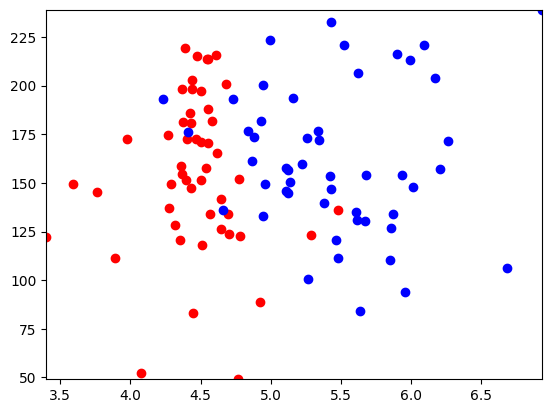

In [76]:
fig, ax = plt.subplots()

# Set plot limits:
min_x, max_x = min(X[:, 0]), max(X[:, 0])
min_y, max_y = min(X[:, 1]), max(X[:, 1])
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)

# First feature:
ax.scatter(X[y == 0, 0], X[y == 0, 1], c='r')
# Second feature:
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='b')

Seperate the two features.

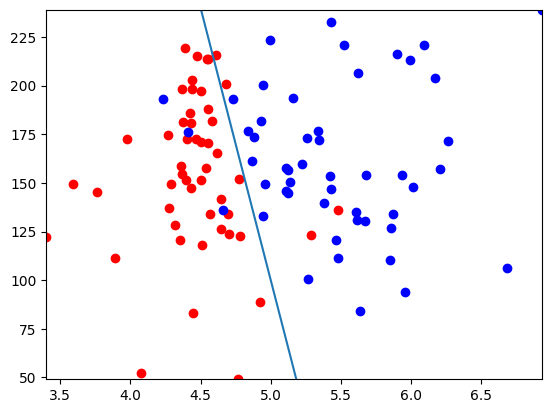

In [77]:
x = np.array([min_x, max_x])
y = -280*x + 1500
ax.plot(x, y)
fig

## 2. Make a function to generate a suitable covariance matrix.